In [265]:
import pandas as pd
import matplotlib.pyplot as plt

In [227]:
unemp = pd.read_csv('data/UNRATE.csv')

In [234]:
random_idx = unemp.sample(frac=0.1).index
random_unemp = unemp.drop(random_idx)

In [242]:
random_unemp

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
839,2017-12-01,4.1
840,2018-01-01,4.1
841,2018-02-01,4.1
842,2018-03-01,4.1


In [236]:
high_unemp_idx = unemp[unemp.UNRATE > 8]

In [239]:
high_unemp_sample_idx = high_unemp_idx.sample(n=int(len(high_unemp_idx) * .2)).index

In [240]:
bias_unemp = unemp.drop(high_unemp_sample_idx)

In [241]:
bias_unemp

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
839,2017-12-01,4.1
840,2018-01-01,4.1
841,2018-02-01,4.1
842,2018-03-01,4.1


In [243]:
merged_unemp = unemp.join(random_unemp.set_index('DATE'), on='DATE', rsuffix='_random')

In [250]:
merged_unemp = merged_unemp.join(bias_unemp.set_index('DATE'), on='DATE', rsuffix='_bias')

In [251]:
merged_unemp

,DATE,UNRATE,UNRATE_random,UNRATE_bias
0,1948-01-01,3.4,3.4,3.4
1,1948-02-01,3.8,3.8,3.8
2,1948-03-01,4.0,4.0,4.0
3,1948-04-01,3.9,3.9,3.9
4,1948-05-01,3.5,3.5,3.5
...,...,...,...,...
839,2017-12-01,4.1,4.1,4.1
840,2018-01-01,4.1,4.1,4.1
841,2018-02-01,4.1,4.1,4.1
842,2018-03-01,4.1,4.1,4.1


In [252]:
random_unemp = merged_unemp[['DATE', 'UNRATE_random']]
bias_unemp = merged_unemp[['DATE', 'UNRATE_bias']]

In [259]:
random_unemp.bfill()

,DATE,UNRATE_random
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
839,2017-12-01,4.1
840,2018-01-01,4.1
841,2018-02-01,4.1
842,2018-03-01,4.1


<AxesSubplot:>

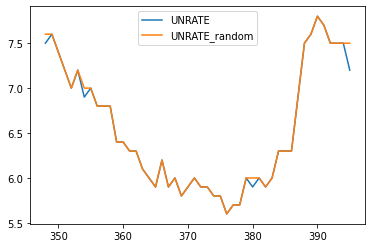

In [262]:
merged_unemp.bfill()[(merged_unemp.DATE > '1977') & (merged_unemp.DATE < '1981')][['DATE', 'UNRATE', 'UNRATE_random']].plot()

<AxesSubplot:xlabel='UNRATE', ylabel='UNRATE_random'>

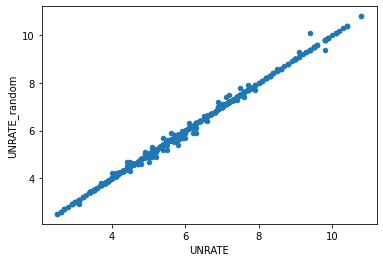

In [261]:
merged_unemp.ffill().plot.scatter(x='UNRATE', y='UNRATE_random')

/tmp/ipykernel_2013343/3794919707.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE'], dtype='object')
  merged_unemp.fillna(merged_unemp.rolling(3,min_periods=1).mean())[(merged_unemp.DATE > '1952') & (merged_unemp.DATE < '1957')][['DATE', 'UNRATE', 'UNRATE_random']].plot()


<AxesSubplot:>

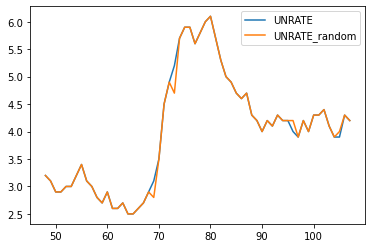

In [263]:
merged_unemp.fillna(merged_unemp.rolling(3,min_periods=1).mean())[(merged_unemp.DATE > '1952') & (merged_unemp.DATE < '1957')][['DATE', 'UNRATE', 'UNRATE_random']].plot()

/tmp/ipykernel_2013343/1554025807.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE'], dtype='object')
  merged_unemp.fillna(merged_unemp.rolling(3,min_periods=1, center=True).mean())[(merged_unemp.DATE > '1952') & (merged_unemp.DATE < '1957')][['DATE', 'UNRATE', 'UNRATE_random']].plot()


<AxesSubplot:>

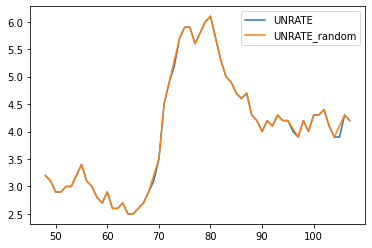

In [264]:
merged_unemp.fillna(merged_unemp.rolling(3,min_periods=1, center=True).mean())[(merged_unemp.DATE > '1952') & (merged_unemp.DATE < '1957')][['DATE', 'UNRATE', 'UNRATE_random']].plot()

<AxesSubplot:>

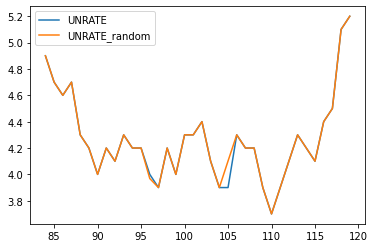

In [271]:
merged_unemp.interpolate(method='polynomial', order=3)[(merged_unemp.DATE > '1955') & (merged_unemp.DATE < '1958')][['DATE', 'UNRATE', 'UNRATE_random']].plot()

<AxesSubplot:>

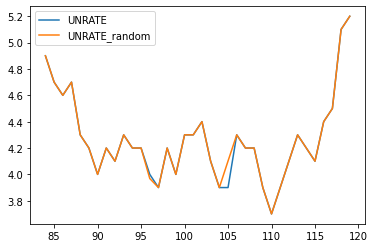

In [267]:
merged_unemp.interpolate(method='cubicspline')[(merged_unemp.DATE > '1955') & (merged_unemp.DATE < '1958')][['DATE', 'UNRATE', 'UNRATE_random']].plot()

# Overall Comparison

In [272]:
random_ff = random_unemp.ffill()
random_roll = random_unemp.rolling(3,min_periods=1).mean()
random_roll_lookahead = random_unemp.rolling(3,min_periods=1, center=True).mean()
random_li = random_unemp.interpolate(method='linear')
random_cubic = random_unemp.interpolate(method='cubicspline')

/tmp/ipykernel_2013343/204330359.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE'], dtype='object')
  random_roll = random_unemp.rolling(3,min_periods=1).mean()
/tmp/ipykernel_2013343/204330359.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE'], dtype='object')
  random_roll_lookahead = random_unemp.rolling(3,min_periods=1, center=True).mean()


In [273]:
((merged_unemp['UNRATE'] - random_ff['UNRATE_random'])**2).mean()

0.0036966824644549742

In [274]:
((merged_unemp['UNRATE'] - random_roll['UNRATE_random'])**2).mean()

0.027674725855463076

In [275]:
((merged_unemp['UNRATE'] - random_roll_lookahead['UNRATE_random'])**2).mean()

0.010282732197119828

In [276]:
((merged_unemp['UNRATE'] - random_li['UNRATE_random'])**2).mean()

0.0018177330173775655

In [277]:
((merged_unemp['UNRATE'] - random_cubic['UNRATE_random'])**2).mean()

0.0031927667013682283

In [278]:
bias_ff = bias_unemp.ffill()
bias_roll = bias_unemp.rolling(3,min_periods=1).mean()
bias_roll_lookahead = bias_unemp.rolling(3,min_periods=1, center=True).mean()
bias_li = bias_unemp.interpolate(method='linear')
bias_cubic = bias_unemp.interpolate(method='cubicspline')

/tmp/ipykernel_2013343/4220485564.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE'], dtype='object')
  bias_roll = bias_unemp.rolling(3,min_periods=1).mean()
/tmp/ipykernel_2013343/4220485564.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['DATE'], dtype='object')
  bias_roll_lookahead = bias_unemp.rolling(3,min_periods=1, center=True).mean()


In [279]:
((merged_unemp['UNRATE'] - bias_ff['UNRATE_bias'])**2).mean()

0.0025947867298578213

In [280]:
((merged_unemp['UNRATE'] - bias_roll['UNRATE_bias'])**2).mean()

0.028932991047919958

In [281]:
((merged_unemp['UNRATE'] - bias_roll_lookahead['UNRATE_bias'])**2).mean()

0.00930818852027383

In [282]:
((merged_unemp['UNRATE'] - bias_li['UNRATE_bias'])**2).mean()

0.00048545286993154047

In [283]:
((merged_unemp['UNRATE'] - bias_cubic['UNRATE_bias'])**2).mean()

0.000557602783032866

# Downsampling

In [ ]:
unemp[::12]

In [ ]:
unemp.rolling(12, min_periods=1).mean()[11::12]